### Plotting the Normalised Frequency for ech length in query.bed

In [ ]:
import matplotlib.pyplot as plt
from collections import defaultdict

length_distribution = defaultdict(int)
fragment_total = 0

with open("query.bed", "r") as file:
    for entry in file:
        parts = entry.strip().split()
        if len(parts) < 3:
            continue
        try:
            p_start = int(parts[1])
            p_end = int(parts[2])
            size = p_end - p_start
            if size > 0:
                length_distribution[size] += 1
                fragment_total += 1
        except ValueError:
            continue

sorted_lengths = sorted(length_distribution)
relative_frequencies = [length_distribution[l] / fragment_total for l in sorted_lengths]


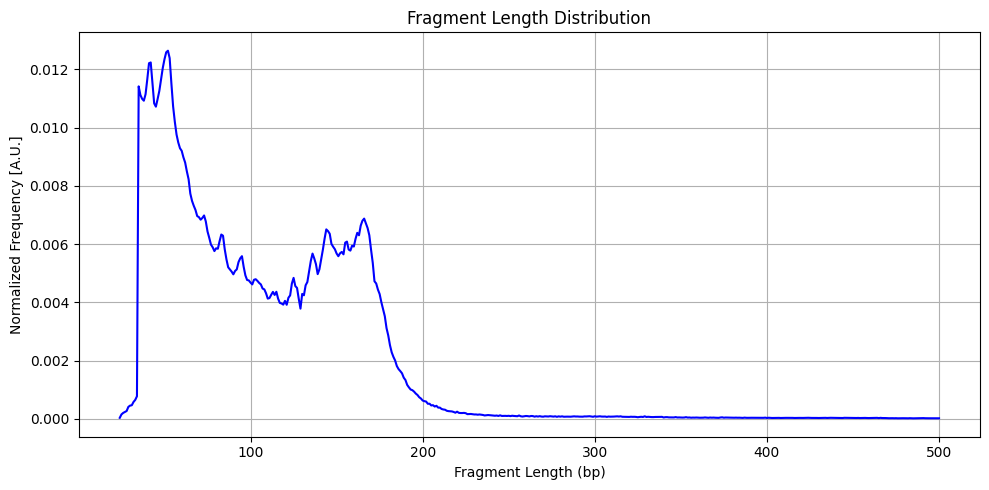

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(sorted_lengths, relative_frequencies, color='steelblue')
plt.xlabel("DNA Fragment Size (bp)")
plt.ylabel("Relative Frequency")
plt.title("Distribution of Fragment Lengths")
plt.grid(True)
plt.tight_layout()
plt.show()


### Rescaling of query along the reference

In [ ]:
ref_profile = {}

with open("reference.hist", "r") as ref_in:
    for line in ref_in:
        tokens = line.strip().split()
        if len(tokens) < 2:
            continue
        try:
            frag_len = int(tokens[0])
            freq_val = float(tokens[1])
            ref_profile[frag_len] = freq_val
        except ValueError:
            continue

ref_total = sum(ref_profile.values())
normalized_reference = {length: freq / ref_total for length, freq in ref_profile.items()}


In [ ]:
from collections import defaultdict

fragment_pool = defaultdict(list)

with open("query.bed", "r") as file:
    for entry in file:
        fields = entry.strip().split()
        if len(fields) < 3:
            continue
        try:
            pos_start = int(fields[1])
            pos_end = int(fields[2])
            frag_size = pos_end - pos_start
            if frag_size > 0:
                fragment_pool[frag_size].append(entry.strip())
        except ValueError:
            continue

total_fragments_collected = sum(len(group) for group in fragment_pool.values())


In [ ]:
import random

sampled_fragments = []

for fragment_length, target_percentage in normalized_reference.items():
    if fragment_length in fragment_pool:
        available_fragments = fragment_pool[fragment_length]
        desired_count = int(round(target_percentage * total_fragments_collected))
        sampled_set = random.sample(available_fragments, min(desired_count, len(available_fragments)))
        sampled_fragments.extend(sampled_set)


In [ ]:
from collections import defaultdict

resampled_counts = defaultdict(int)

for fragment in sampled_fragments:
    fields = fragment.strip().split()
    frag_size = int(fields[2]) - int(fields[1])
    resampled_counts[frag_size] += 1

total_resampled_fragments = sum(resampled_counts.values())
lengths_sorted = sorted(resampled_counts.keys())
normalized_counts = [resampled_counts[length] / total_resampled_fragments for length in lengths_sorted]


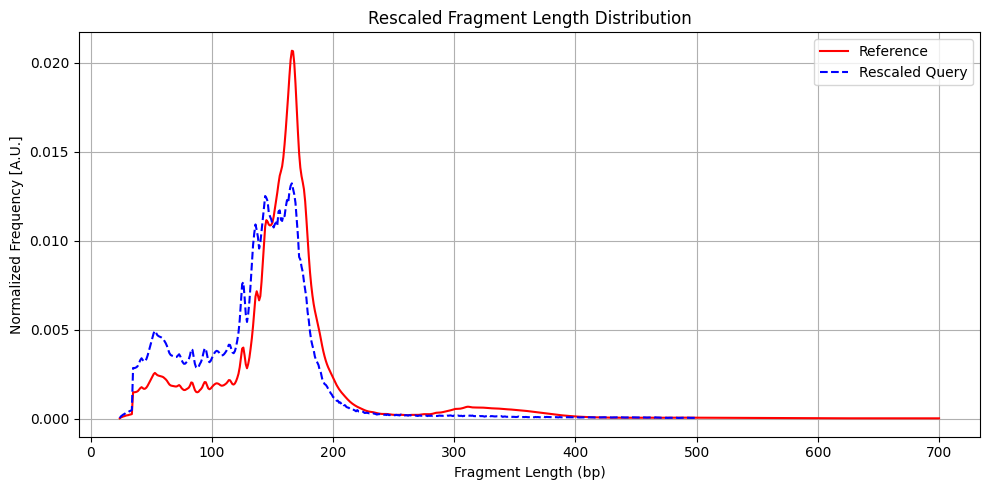

In [ ]:
plt.figure(figsize=(10, 5))

ref_sorted_x = sorted(normalized_reference.keys())
ref_sorted_y = [normalized_reference[length] for length in ref_sorted_x]
plt.plot(ref_sorted_x, ref_sorted_y, label="Reference Distribution", color='darkred')

plt.plot(lengths_sorted, normalized_counts, label="Rescaled Query Distribution", color='royalblue', linestyle='--')
plt.xlabel("Fragment Size (bp)")
plt.ylabel("Relative Frequency")
plt.title("Comparison of Rescaled Fragment Length Distributions")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
